# INDENG 242 Final Project

## Boostrapping

The purpose of this document

In [1]:
import pandas as pd
import numpy as np

In [2]:
Team1vsTeam2 = pd.read_excel('Team1vsTeam2_2019-2023.xlsx') #source: https://oracleselixir.com/stats/teams/byTournament
Team1vsTeam2

,index,WR,KD,CKPM,GPR,GSPD,EGR,MLR,FB,FT,...,HLD,FD,DRG,ELD,BN,LNE,JNG,WPM,CWPM,IsWin
0,T1,0.119447,0.13,-0.02,0.37,0.014,1.1,10.9,-0.01,0.05,...,0.02,0.05,0.03,0.25,0.11,-0.003,-0.004,0.23,0.03,1
1,Cloud9,0.196685,0.35,-0.18,0.33,0.045,4.0,15.2,0.00,-0.07,...,0.12,0.10,0.06,0.00,0.10,-0.001,0.027,0.26,-0.05,1
2,Gen.G,0.030134,0.25,-0.23,0.27,0.025,7.0,-4.0,0.15,0.12,...,-0.05,-0.05,0.00,-0.40,0.01,0.002,0.019,-0.02,-0.17,1
3,Team BDS,-0.236601,-0.55,-0.05,-1.07,-0.089,-9.7,-16.2,0.01,-0.07,...,-0.03,0.05,-0.04,0.64,-0.08,-0.012,-0.058,-0.22,-0.17,0
4,G2 Esports,0.099203,0.01,0.35,0.27,0.030,-0.4,10.4,-0.10,0.08,...,0.10,-0.02,-0.03,0.56,0.06,0.001,0.017,-0.25,-0.57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,J Team,-0.109790,-0.30,-0.20,-0.47,-0.027,-5.8,-5.7,-0.12,-0.09,...,-0.05,-0.11,-0.07,-0.09,-0.08,0.000,-0.024,0.26,0.12,1
364,Dplus KIA,-0.070833,-0.09,-0.02,-0.10,0.019,-7.0,-0.1,-0.15,-0.03,...,0.04,-0.11,-0.02,-0.44,0.01,0.001,0.019,0.56,0.30,0
365,Invictus Gaming,0.103757,-0.03,0.38,0.17,0.022,1.5,9.5,-0.23,0.04,...,-0.10,-0.11,-0.05,0.03,0.10,0.016,0.039,-0.54,-0.28,1
366,Royal Never Give Up,0.177327,0.30,0.12,0.60,0.019,8.0,11.2,0.03,-0.01,...,-0.10,0.16,0.07,0.51,0.09,-0.001,0.000,0.06,-0.10,1


Model accuracy is reported on the test set. 1000 bootstrapped samples were used to calculate 95% confidence intervals.
Median accuracy is 0.66 with a 95% a confidence interval of [0.61,0.70].


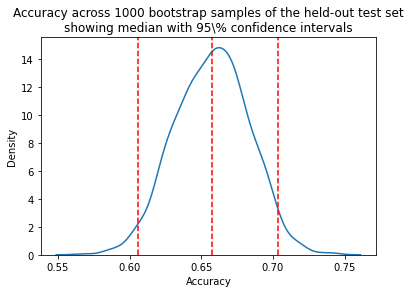

In [3]:
# Logistic Regression
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

# partition data into training and test sets
y = Team1vsTeam2['IsWin']
X = Team1vsTeam2[['WR','KD','GPR','GSPD','F3T','FD','ELD','JNG','WPM','CWPM']]

X = X.values
y = y.values.ravel()

# train model
reg = LogisticRegression()
reg.fit(X, y)

# bootstrap predictions
accuracy = []
n_iterations = 1000
for i in range(n_iterations):
    X_bs, y_bs = resample(X, y, replace=True)
    # make predictions
    y_hat = reg.predict(X_bs)
    # evaluate model
    score = accuracy_score(y_bs, y_hat)
    accuracy.append(score)

# get median
median = np.percentile(accuracy, 50)

# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy, alpha/2)
upper_ci = np.percentile(accuracy, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples " 
      f"were used to calculate 95% confidence intervals.\n"
      f"Median accuracy is {median:.2f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}].")

import seaborn as sns
sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set\n"
          "showing median with 95\\% confidence intervals")
plt.xlabel("Accuracy")
plt.axvline(median,0, 14, linestyle="--", color="red")
plt.axvline(lower_ci,0, 14, linestyle="--", color="red")
plt.axvline(upper_ci,0, 14, linestyle="--", color="red")
plt.show()

Fitting 5 folds for each of 201 candidates, totalling 1005 fits
Model accuracy is reported on the test set. 1000 bootstrapped samples were used to calculate 95% confidence intervals.
Median accuracy is 0.63 with a 95% a confidence interval of [0.58,0.68].


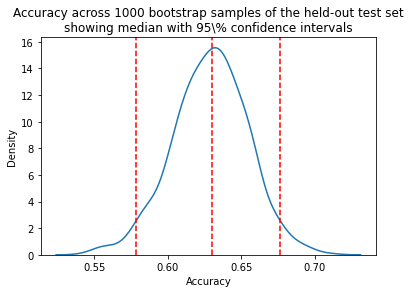

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

X = Team1vsTeam2[['WR','KD','CKPM','GSPD','EGR','MLR','FT','FB','HLD','FD','DRG','ELD','BN','JNG','WPM','CWPM']]

y = Team1vsTeam2[['IsWin']]

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'class_weight' : [{0: 1, 1: 20}],
               'random_state': [88]}

            
dtc3 = DecisionTreeClassifier()

cv = KFold(n_splits=5,random_state=1,shuffle=True) 

dtc3_cv_acc = GridSearchCV(dtc3, param_grid = grid_values, scoring = 'accuracy', cv=cv, verbose=1) 

dtc3_cv_acc.fit(X, y)

# bootstrap predictions
accuracy = []
n_iterations = 1000
for i in range(n_iterations):
    X_bs, y_bs = resample(X, y, replace=True)
    # make predictions
    y_hat = dtc3_cv_acc.predict(X_bs)
    # evaluate model
    score = accuracy_score(y_bs, y_hat)
    accuracy.append(score)

# get median
median = np.percentile(accuracy, 50)

# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy, alpha/2)
upper_ci = np.percentile(accuracy, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples " 
      f"were used to calculate 95% confidence intervals.\n"
      f"Median accuracy is {median:.2f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}].")

sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set\n"
          "showing median with 95\\% confidence intervals")
plt.xlabel("Accuracy")
plt.axvline(median,0, 14, linestyle="--", color="red")
plt.axvline(lower_ci,0, 14, linestyle="--", color="red")
plt.axvline(upper_ci,0, 14, linestyle="--", color="red")
plt.show()

Model accuracy is reported on the test set. 1000 bootstrapped samples were used to calculate 95% confidence intervals.
Median accuracy is 0.68 with a 95% a confidence interval of [0.63,0.72].


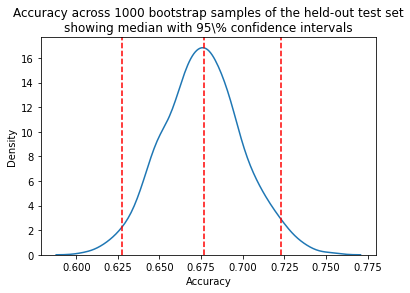

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
X = Team1vsTeam2[['WR','CKPM','MLR','FB','FT','F3T','HLD','FD','DRG','ELD','LNE','JNG','WPM']]
y = Team1vsTeam2['IsWin']
kf = KFold(n_splits=15, shuffle=True, random_state=42)

rf_classifier = RandomForestClassifier(random_state=1,
    class_weight='balanced')
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10, 20, 30],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'min_impurity_decrease': np.arange(0.0, 0.4, 0.01)  
}
scorer = make_scorer(accuracy_score)
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, scoring=scorer, cv=kf, n_iter=10, random_state=42)
random_search.fit(X, y)

# bootstrap predictions
accuracy = []
n_iterations = 1000
for i in range(n_iterations):
    X_bs, y_bs = resample(X, y, replace=True)
    # make predictions
    y_hat = random_search.predict(X_bs)
    # evaluate model
    score = accuracy_score(y_bs, y_hat)
    accuracy.append(score)

# get median
median = np.percentile(accuracy, 50)

# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy, alpha/2)
upper_ci = np.percentile(accuracy, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples " 
      f"were used to calculate 95% confidence intervals.\n"
      f"Median accuracy is {median:.2f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}].")

sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set\n"
          "showing median with 95\\% confidence intervals")
plt.xlabel("Accuracy")
plt.axvline(median,0, 14, linestyle="--", color="red")
plt.axvline(lower_ci,0, 14, linestyle="--", color="red")
plt.axvline(upper_ci,0, 14, linestyle="--", color="red")
plt.show()

C:\Users\Xilin\anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Model accuracy is reported on the test set. 1000 bootstrapped samples were used to calculate 95% confidence intervals.
Median accuracy is 0.91 with a 95% a confidence interval of [0.88,0.93].


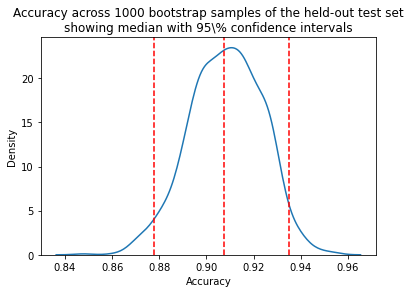

In [6]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Separate features and target
X = Team1vsTeam2.drop('index', axis=1)
X = X.drop('IsWin', axis=1)
y = Team1vsTeam2['IsWin']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and train XGBoost model
model = xgb.XGBClassifier(n_estimators=50, max_depth=3, use_label_encoder=False, eval_metric='logloss')
model.fit(X_scaled, y)

# bootstrap predictions
accuracy = []
n_iterations = 1000
for i in range(n_iterations):
    X_bs, y_bs = resample(X_scaled, y, replace=True)
    # make predictions
    y_hat = model.predict(X_bs)
    # evaluate model
    score = accuracy_score(y_bs, y_hat)
    accuracy.append(score)

# get median
median = np.percentile(accuracy, 50)

# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy, alpha/2)
upper_ci = np.percentile(accuracy, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples " 
      f"were used to calculate 95% confidence intervals.\n"
      f"Median accuracy is {median:.2f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}].")

sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set\n"
          "showing median with 95\\% confidence intervals")
plt.xlabel("Accuracy")
plt.axvline(median,0, 14, linestyle="--", color="red")
plt.axvline(lower_ci,0, 14, linestyle="--", color="red")
plt.axvline(upper_ci,0, 14, linestyle="--", color="red")
plt.show()

### With K-mean

In [7]:
#ADD KMeans category to Team1vsTeam2

from sklearn.cluster import KMeans

kmeans_features = Team1vsTeam2[['WR','KD','CKPM','GPR','GSPD','EGR','MLR','FB','FT','F3T','HLD','FD','DRG','ELD','BN','LNE','JNG','WPM','CWPM']]  
kmeans = KMeans(n_clusters = 4)  
kmeans.fit(kmeans_features)
Team1vsTeam2['KMeans_Cluster'] = kmeans.labels_
Team1vsTeam2

,index,WR,KD,CKPM,GPR,GSPD,EGR,MLR,FB,FT,...,FD,DRG,ELD,BN,LNE,JNG,WPM,CWPM,IsWin,KMeans_Cluster
0,T1,0.119447,0.13,-0.02,0.37,0.014,1.1,10.9,-0.01,0.05,...,0.05,0.03,0.25,0.11,-0.003,-0.004,0.23,0.03,1,1
1,Cloud9,0.196685,0.35,-0.18,0.33,0.045,4.0,15.2,0.00,-0.07,...,0.10,0.06,0.00,0.10,-0.001,0.027,0.26,-0.05,1,1
2,Gen.G,0.030134,0.25,-0.23,0.27,0.025,7.0,-4.0,0.15,0.12,...,-0.05,0.00,-0.40,0.01,0.002,0.019,-0.02,-0.17,1,2
3,Team BDS,-0.236601,-0.55,-0.05,-1.07,-0.089,-9.7,-16.2,0.01,-0.07,...,0.05,-0.04,0.64,-0.08,-0.012,-0.058,-0.22,-0.17,0,3
4,G2 Esports,0.099203,0.01,0.35,0.27,0.030,-0.4,10.4,-0.10,0.08,...,-0.02,-0.03,0.56,0.06,0.001,0.017,-0.25,-0.57,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,J Team,-0.109790,-0.30,-0.20,-0.47,-0.027,-5.8,-5.7,-0.12,-0.09,...,-0.11,-0.07,-0.09,-0.08,0.000,-0.024,0.26,0.12,1,3
364,Dplus KIA,-0.070833,-0.09,-0.02,-0.10,0.019,-7.0,-0.1,-0.15,-0.03,...,-0.11,-0.02,-0.44,0.01,0.001,0.019,0.56,0.30,0,3
365,Invictus Gaming,0.103757,-0.03,0.38,0.17,0.022,1.5,9.5,-0.23,0.04,...,-0.11,-0.05,0.03,0.10,0.016,0.039,-0.54,-0.28,1,1
366,Royal Never Give Up,0.177327,0.30,0.12,0.60,0.019,8.0,11.2,0.03,-0.01,...,0.16,0.07,0.51,0.09,-0.001,0.000,0.06,-0.10,1,2


Model accuracy is reported on the test set. 1000 bootstrapped samples were used to calculate 95% confidence intervals.
Median accuracy is 0.66 with a 95% a confidence interval of [0.61,0.71].


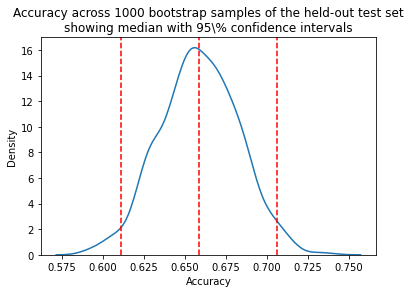

In [8]:
# partition data into training and test sets
y = Team1vsTeam2['IsWin']
X = Team1vsTeam2[['WR','KD','GPR','GSPD','F3T','FD','ELD','JNG','WPM','CWPM', 'KMeans_Cluster']]
X = X.values
y = y.values.ravel()
# train model
reg = LogisticRegression()
reg.fit(X, y)

# bootstrap predictions
accuracy = []
n_iterations = 1000
for i in range(n_iterations):
    X_bs, y_bs = resample(X, y, replace=True)
    # make predictions
    y_hat = reg.predict(X_bs)
    # evaluate model
    score = accuracy_score(y_bs, y_hat)
    accuracy.append(score)

# get median
median = np.percentile(accuracy, 50)

# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy, alpha/2)
upper_ci = np.percentile(accuracy, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples " 
      f"were used to calculate 95% confidence intervals.\n"
      f"Median accuracy is {median:.2f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}].")

import seaborn as sns
sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set\n"
          "showing median with 95\\% confidence intervals")
plt.xlabel("Accuracy")
plt.axvline(median,0, 14, linestyle="--", color="red")
plt.axvline(lower_ci,0, 14, linestyle="--", color="red")
plt.axvline(upper_ci,0, 14, linestyle="--", color="red")
plt.show()

Fitting 5 folds for each of 201 candidates, totalling 1005 fits
Model accuracy is reported on the test set. 1000 bootstrapped samples were used to calculate 95% confidence intervals.
Median accuracy is 0.63 with a 95% a confidence interval of [0.58,0.68].


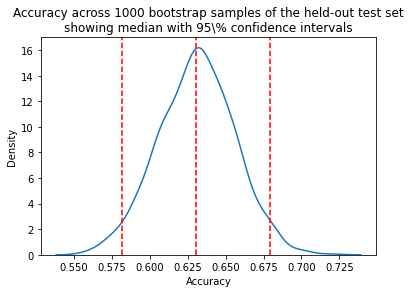

In [9]:
X = Team1vsTeam2[['WR','KD','CKPM','GSPD','EGR','MLR','FT','FB','HLD','FD','DRG','ELD','BN','JNG','WPM','CWPM', 'KMeans_Cluster']]

y = Team1vsTeam2[['IsWin']]

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'class_weight' : [{0: 1, 1: 20}],
               'random_state': [88]}

            
dtc3 = DecisionTreeClassifier()

cv = KFold(n_splits=5,random_state=1,shuffle=True) 

dtc3_cv_acc = GridSearchCV(dtc3, param_grid = grid_values, scoring = 'accuracy', cv=cv, verbose=1) 

dtc3_cv_acc.fit(X, y)

# bootstrap predictions
accuracy = []
n_iterations = 1000
for i in range(n_iterations):
    X_bs, y_bs = resample(X, y, replace=True)
    # make predictions
    y_hat = dtc3_cv_acc.predict(X_bs)
    # evaluate model
    score = accuracy_score(y_bs, y_hat)
    accuracy.append(score)

# get median
median = np.percentile(accuracy, 50)

# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy, alpha/2)
upper_ci = np.percentile(accuracy, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples " 
      f"were used to calculate 95% confidence intervals.\n"
      f"Median accuracy is {median:.2f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}].")

sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set\n"
          "showing median with 95\\% confidence intervals")
plt.xlabel("Accuracy")
plt.axvline(median,0, 14, linestyle="--", color="red")
plt.axvline(lower_ci,0, 14, linestyle="--", color="red")
plt.axvline(upper_ci,0, 14, linestyle="--", color="red")
plt.show()

Model accuracy is reported on the test set. 1000 bootstrapped samples were used to calculate 95% confidence intervals.
Median accuracy is 0.69 with a 95% a confidence interval of [0.64,0.73].


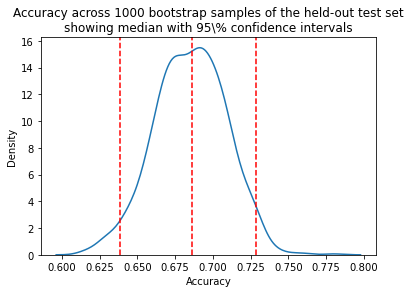

In [10]:
X = Team1vsTeam2[['WR','CKPM','MLR','FB','FT','F3T','HLD','FD','DRG','ELD','LNE','JNG','WPM', 'KMeans_Cluster']]
y = Team1vsTeam2['IsWin']
kf = KFold(n_splits=15, shuffle=True, random_state=42)

rf_classifier = RandomForestClassifier(random_state=1,
    class_weight='balanced')
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10, 20, 30],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'min_impurity_decrease': np.arange(0.0, 0.4, 0.01)  
}
scorer = make_scorer(accuracy_score)
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, scoring=scorer, cv=kf, n_iter=10, random_state=42)
random_search.fit(X, y)

# bootstrap predictions
accuracy = []
n_iterations = 1000
for i in range(n_iterations):
    X_bs, y_bs = resample(X, y, replace=True)
    # make predictions
    y_hat = random_search.predict(X_bs)
    # evaluate model
    score = accuracy_score(y_bs, y_hat)
    accuracy.append(score)

# get median
median = np.percentile(accuracy, 50)

# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy, alpha/2)
upper_ci = np.percentile(accuracy, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples " 
      f"were used to calculate 95% confidence intervals.\n"
      f"Median accuracy is {median:.2f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}].")

sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set\n"
          "showing median with 95\\% confidence intervals")
plt.xlabel("Accuracy")
plt.axvline(median,0, 14, linestyle="--", color="red")
plt.axvline(lower_ci,0, 14, linestyle="--", color="red")
plt.axvline(upper_ci,0, 14, linestyle="--", color="red")
plt.show()

Model accuracy is reported on the test set. 1000 bootstrapped samples were used to calculate 95% confidence intervals.
Median accuracy is 0.91 with a 95% a confidence interval of [0.88,0.93].


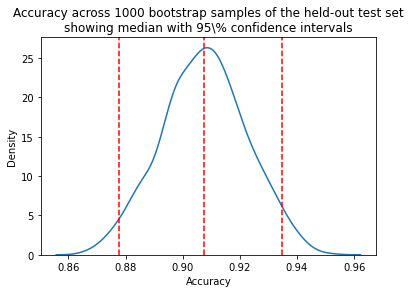

In [11]:
# Separate features and target
X = Team1vsTeam2.drop('index', axis=1)
X = X.drop('IsWin', axis=1)
y = Team1vsTeam2['IsWin']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and train XGBoost model
model = xgb.XGBClassifier(n_estimators=50, max_depth=3, use_label_encoder=False, eval_metric='logloss')
model.fit(X_scaled, y)

# bootstrap predictions
accuracy = []
n_iterations = 1000
for i in range(n_iterations):
    X_bs, y_bs = resample(X_scaled, y, replace=True)
    # make predictions
    y_hat = model.predict(X_bs)
    # evaluate model
    score = accuracy_score(y_bs, y_hat)
    accuracy.append(score)

# get median
median = np.percentile(accuracy, 50)

# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy, alpha/2)
upper_ci = np.percentile(accuracy, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples " 
      f"were used to calculate 95% confidence intervals.\n"
      f"Median accuracy is {median:.2f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}].")

sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set\n"
          "showing median with 95\\% confidence intervals")
plt.xlabel("Accuracy")
plt.axvline(median,0, 14, linestyle="--", color="red")
plt.axvline(lower_ci,0, 14, linestyle="--", color="red")
plt.axvline(upper_ci,0, 14, linestyle="--", color="red")
plt.show()

# Conclusion:

Boost plays best and is stable, adding k-mean clusters as a feature does not improve the model very much